# Explore here

In [61]:
# Librerías

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv')

df


,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [63]:
print(list(df.columns))

['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'Percent of adults with les

Problema: 

Variable a predecir: "Diabetes Prevalence" 

In [64]:
# Análisamos la variable a predecir

df['diabetes_prevalence'].head()

0    12.9
1    12.0
2    19.7
3    14.1
4    13.5
Name: diabetes_prevalence, dtype: float64

Nota:

    'diabetes_prevalence' contiene valores númericos continuos

In [65]:
def separar_columnas(df):
  
    categoricas = []
    numericas = []
    
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            numericas.append(col)
        else:
            categoricas.append(col)
    
    return print(f'Categóricas: {categoricas}\nNúmericas: {numericas}')

separar_columnas(df)

Categóricas: ['COUNTY_NAME', 'STATE_NAME']
Númericas: ['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's 

In [66]:
# Verificación de filas duplicadas

print(f'Filas Duplicadas: {df.duplicated().sum()}')
df

Filas Duplicadas: 0


,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [67]:
df[['COUNTY_NAME', 'STATE_NAME']]

,COUNTY_NAME,STATE_NAME
0,Autauga,Alabama
1,Baldwin,Alabama
2,Barbour,Alabama
3,Bibb,Alabama
4,Blount,Alabama
...,...,...
3135,Sweetwater,Wyoming
3136,Teton,Wyoming
3137,Uinta,Wyoming
3138,Washakie,Wyoming


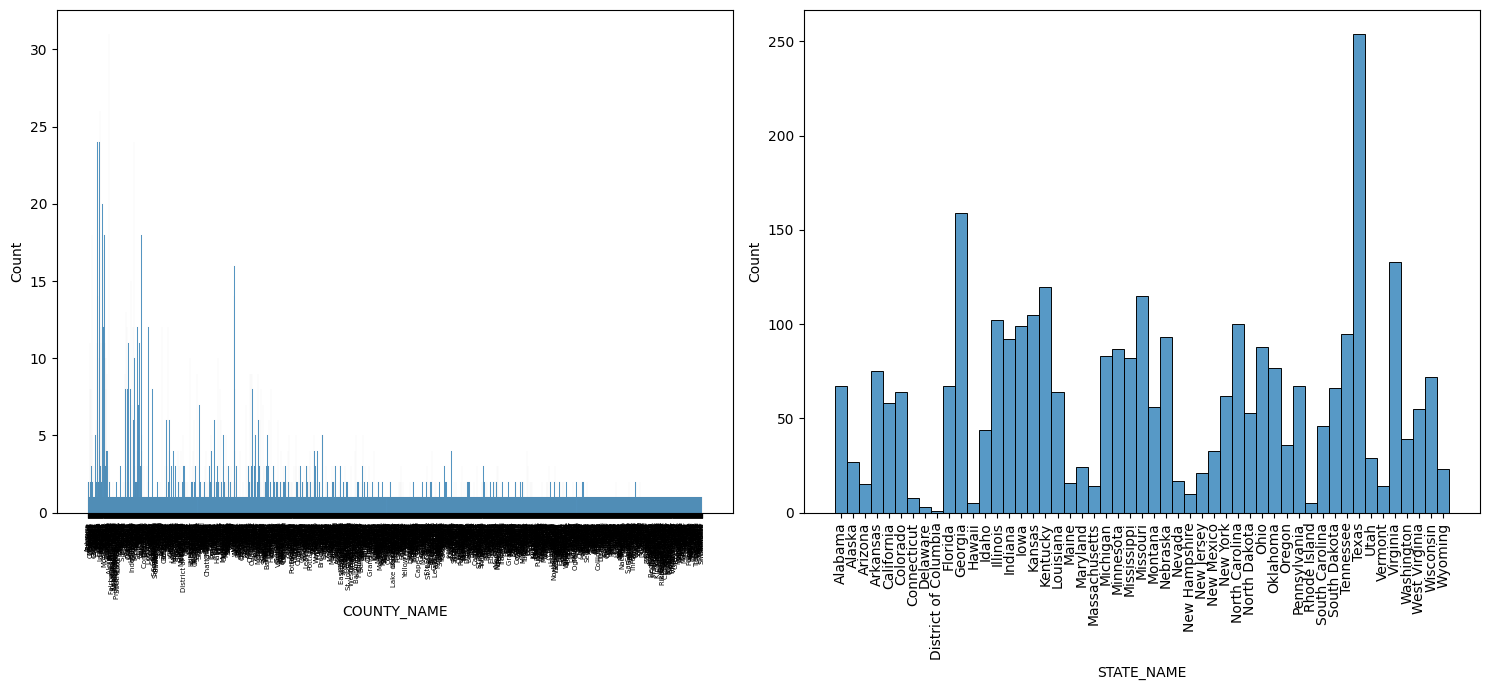

In [75]:
# Análisis Univariante 
    #Categorico

fig, axis = plt.subplots(1, 2, figsize=(15, 7))


sns.histplot(ax=axis[0], data=df, x='COUNTY_NAME')
sns.histplot(ax=axis[1], data=df, x='STATE_NAME')


plt.setp(axis[0].get_xticklabels(), rotation=90)
plt.setp(axis[1].get_xticklabels(), rotation=90)

for label in axis[0].get_xticklabels():
    label.set_fontsize(5) 

plt.tight_layout()
plt.show()

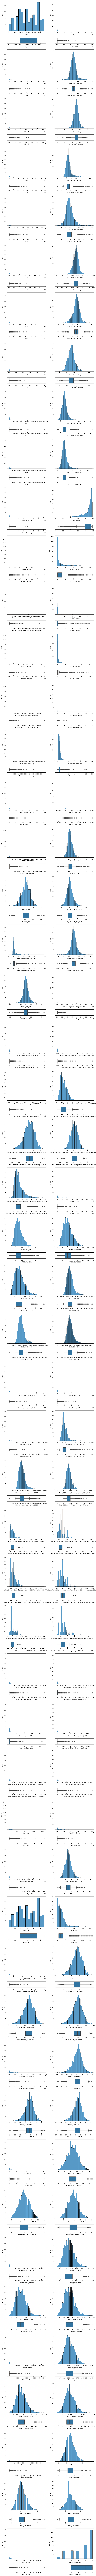

In [79]:
def plot_numeric_features(df):
    # Verificar que el DataFrame contiene solo variables numéricas
    if not all(df.dtypes.apply(lambda x: pd.api.types.is_numeric_dtype(x))):
        raise ValueError("El DataFrame debe contener solo variables numéricas.")

    # Determinar el número de variables numéricas
    num_vars = df.select_dtypes(include='number').columns
    num_vars_count = len(num_vars)

    # Calcular el número de filas necesarias para el subplot
    n_rows = (num_vars_count + 1) // 2  # Redondear hacia arriba para obtener suficientes filas

    # Crear la figura y los ejes
    fig, axis = plt.subplots(n_rows * 2, 2, figsize=(10, n_rows * 5), gridspec_kw={"height_ratios": [5, 1] * n_rows})

    # Iterar sobre cada variable numérica y crear gráficos
    for i, var in enumerate(num_vars):
        row = i // 2 * 2  # Fila del histograma
        col = i % 2  # Columna del histograma
        
        # Graficar histogramas
        sns.histplot(ax=axis[row, col], data=df, x=var)
        # Graficar boxplots
        sns.boxplot(ax=axis[row + 1, col], data=df, x=var)

    # Ajustar el layout para evitar solapamiento
    plt.tight_layout()
    plt.show()

df_num = df.drop(['COUNTY_NAME', 'STATE_NAME'],axis=1)
plot_numeric_features(df_num)
# Ejemplo de uso
# df_numerico = df.select_dtypes(include='number')  # Asegúrate de pasar solo variables numéricas
# plot_numeric_features(df_numerico)

CLASE:

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv')
df.select_dtypes('object').columns.to_list()

['COUNTY_NAME', 'STATE_NAME']

In [45]:
df.drop(['COUNTY_NAME', 'STATE_NAME'],axis=1,inplace=True)

In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = df.drop('diabetes_prevalence',axis=1)
y = df['diabetes_prevalence']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

scaler = MinMaxScaler()
X_train_esc = scaler.fit_transform(X_train)
X_test_esc = scaler.transform(X_test)


X_train_esc

array([[4.56468023e-01, 2.62601394e-03, 2.66583240e-03, ...,
        4.56521739e-01, 3.23010729e-03, 1.00000000e+00],
       [7.47056686e-01, 5.06440597e-03, 4.36332457e-03, ...,
        3.91304348e-01, 6.10271573e-03, 8.00000000e-01],
       [3.11228198e-01, 3.72977696e-03, 3.24021542e-03, ...,
        2.39130435e-01, 3.65069418e-03, 2.00000000e-01],
       ...,
       [3.82194767e-01, 3.30070071e-03, 3.87336096e-03, ...,
        5.00000000e-01, 4.24792756e-03, 1.00000000e+00],
       [4.56540698e-01, 5.64745884e-04, 2.73949247e-04, ...,
        6.52173913e-01, 9.50526364e-04, 1.00000000e+00],
       [3.29651163e-01, 8.74876180e-04, 9.03784224e-04, ...,
        3.04347826e-01, 8.91644200e-04, 1.00000000e+00]])

In [47]:
X_train_esc = pd.DataFrame(X_train_esc,columns=X_train.columns,index=X_train.index) #Probar con resetindex
X_test_esc = pd.DataFrame(X_test_esc,columns=X_test.columns,index=X_test.index)

X_train_esc.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_Upper 95% CI,COPD_number,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
1292,0.456468,0.002626,0.002666,0.484236,0.002795,0.558117,0.001877,0.316717,0.001876,0.280961,...,0.491620,0.005315,0.381720,0.414141,0.002953,0.441860,0.425,0.456522,0.003230,1.0
2302,0.747057,0.005064,0.004363,0.411625,0.004641,0.481367,0.003299,0.289175,0.003549,0.268121,...,0.407821,0.009422,0.344086,0.378788,0.005676,0.372093,0.350,0.391304,0.006103,0.8
761,0.311228,0.003730,0.003240,0.414798,0.004130,0.581316,0.003983,0.473765,0.002898,0.338200,...,0.346369,0.006416,0.306452,0.323232,0.003872,0.232558,0.225,0.239130,0.003651,0.2
2194,0.710901,0.009094,0.009239,0.485763,0.010205,0.589934,0.007447,0.363781,0.007555,0.387664,...,0.284916,0.013152,0.263441,0.267677,0.008298,0.255814,0.250,0.260870,0.008895,0.4
1241,0.454615,0.013300,0.013820,0.496981,0.014257,0.563664,0.011098,0.370826,0.010642,0.359468,...,0.379888,0.023026,0.333333,0.338384,0.013626,0.348837,0.350,0.347826,0.014666,0.6


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 

model_lineal = LinearRegression()
model_lasso = Lasso()

model_lineal.fit(X_train_esc,y_train)
model_lasso.fit(X_train_esc,y_train)




Lasso()

In [49]:
y_pred_lineal = model_lineal.predict(X_test_esc)
y_pred_lasso = model_lasso.predict(X_test_esc)

In [50]:
from sklearn.metrics import r2_score,mean_squared_error

print (f'El MSE del modelo lineal es de {mean_squared_error(y_test,y_pred_lineal)} y el de lasso es de {mean_squared_error(y_test,y_pred_lasso)}')
print(f'El R2 del modelo lineal es de {r2_score(y_test,y_pred_lineal)} y el de lasso es de {r2_score(y_test,y_pred_lasso)}')

El MSE del modelo lineal es de 0.0019392228068378988 y el de lasso es de 8.068533313978255
El R2 del modelo lineal es de 0.999758897653797 y el de lasso es de -0.0031556485192774097


In [51]:
import numpy as np

alpha = np.linspace(0,20,201)
alpha

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [52]:
r2_lista = []
for a in alpha:
    model_lasso_alpha = Lasso(alpha=a)
    model_lasso_alpha.fit(X_train_esc,y_train)
    y_pred_alpha = model_lasso_alpha.predict(X_test_esc)
    r2_lista.append((a,r2_score(y_test,y_pred_alpha)))



/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.690e+00, tolerance: 1.823e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_f

In [53]:
r2_lista

[(np.float64(0.0), 0.9996941584481323),
 (np.float64(0.1), 0.9270800121218915),
 (np.float64(0.2), 0.7175060347486991),
 (np.float64(0.30000000000000004), 0.37173284541119644),
 (np.float64(0.4), -0.0031556485192774097),
 (np.float64(0.5), -0.0031556485192774097),
 (np.float64(0.6000000000000001), -0.0031556485192774097),
 (np.float64(0.7000000000000001), -0.0031556485192774097),
 (np.float64(0.8), -0.0031556485192774097),
 (np.float64(0.9), -0.0031556485192774097),
 (np.float64(1.0), -0.0031556485192774097),
 (np.float64(1.1), -0.0031556485192774097),
 (np.float64(1.2000000000000002), -0.0031556485192774097),
 (np.float64(1.3), -0.0031556485192774097),
 (np.float64(1.4000000000000001), -0.0031556485192774097),
 (np.float64(1.5), -0.0031556485192774097),
 (np.float64(1.6), -0.0031556485192774097),
 (np.float64(1.7000000000000002), -0.0031556485192774097),
 (np.float64(1.8), -0.0031556485192774097),
 (np.float64(1.9000000000000001), -0.0031556485192774097),
 (np.float64(2.0), -0.0031556

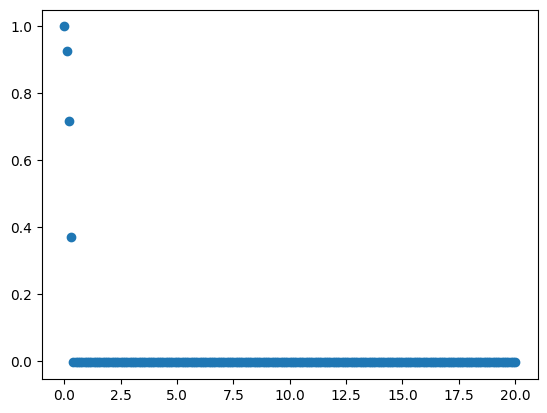

In [54]:
import matplotlib.pyplot as plt

plt.scatter(*zip(*r2_lista))
plt.show()

Cada vez que penalizo mas fuerte estoy perdiendo informacion, esto quiere decir que mis columnas son relevantes

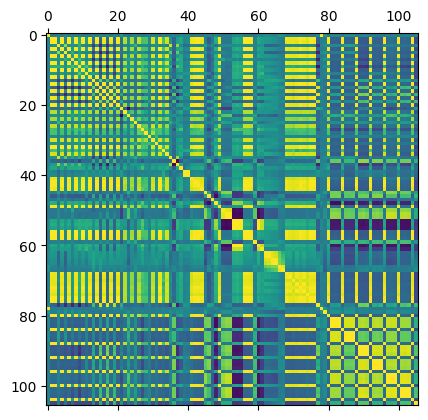

In [55]:
plt.matshow(df.corr())
plt.show()

In [56]:
print(list(df.corr()['diabetes_prevalence']))

[-0.031057353038763228, -0.17484326019295857, -0.16749453046294474, -0.028295098372999435, -0.1784214719280391, -0.15171344598605987, -0.1750334388260586, -0.2270019165597107, -0.17092057343804395, -0.3095646212171594, -0.17150952524526059, -0.08162210324840072, -0.17716132384696173, 0.11105454037293859, -0.18010659064338824, 0.20714145716502963, -0.17179397486475326, 0.33703105229446484, -0.1657786203476731, 0.16076754331066417, -0.1969057786714336, -0.41039164251342786, -0.06554165954146708, 0.4747999613655144, -0.08004582177080302, 0.1227737727345247, -0.11955754816657051, -0.31041751726618094, -0.08180200712491946, -0.022165299033643646, -0.16951661229505754, -0.1324204847158863, -0.17484326019295857, -0.18104254378658965, -0.21192735243992483, -0.03234925904655887, 0.5396430330351476, -0.37787252590316006, -0.19371645907686758, -0.16000378210547073, -0.19775525413377604, -0.07834840190039481, -0.15611004841678472, -0.17891555191633304, -0.20833341813997697, 0.6992511637198219, 0.4

Tenemos columnas con una correlacion muy alta con respecto a nuestra variable objetivo... lo cual sesga el modelo

In [57]:
corr_matrix = df.corr().abs()
corr_matrix

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
fips,1.000000,0.056079,0.049580,0.010586,0.053130,0.018994,0.053591,0.030310,0.051715,0.045491,...,0.063463,0.031057,0.036327,0.026483,0.056055,0.040631,0.044576,0.033649,0.062322,0.008345
TOT_POP,0.056079,1.000000,0.994010,0.052507,0.994596,0.023384,0.994558,0.160254,0.995526,0.295635,...,0.981495,0.174843,0.160621,0.187362,0.989583,0.218731,0.202895,0.230914,0.993889,0.428608
0-9,0.049580,0.994010,1.000000,0.085920,0.997487,0.048341,0.989992,0.161984,0.990971,0.304263,...,0.972641,0.167495,0.152687,0.180585,0.984664,0.216430,0.200512,0.229570,0.985337,0.423641
0-9 y/o % of total pop,0.010586,0.052507,0.085920,1.000000,0.074714,0.687844,0.056047,0.130136,0.058535,0.342930,...,0.034582,0.028295,0.005923,0.048949,0.047539,0.133841,0.117138,0.153847,0.040384,0.050916
19-Oct,0.053130,0.994596,0.997487,0.074714,1.000000,0.056762,0.988552,0.167605,0.987298,0.294682,...,0.973427,0.178421,0.163623,0.191449,0.982778,0.226956,0.210885,0.239865,0.985221,0.431290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CKD_prevalence,0.040631,0.218731,0.216430,0.133841,0.226956,0.276999,0.219593,0.366835,0.215739,0.478115,...,0.191943,0.918514,0.908023,0.925347,0.175064,1.000000,0.995203,0.995594,0.183045,0.471775
CKD_Lower 95% CI,0.044576,0.202895,0.200512,0.117138,0.210885,0.259547,0.203506,0.341480,0.199999,0.450913,...,0.176039,0.924630,0.917499,0.928512,0.159501,0.995203,1.000000,0.989756,0.167424,0.454327
CKD_Upper 95% CI,0.033649,0.230914,0.229570,0.153847,0.239865,0.296576,0.232199,0.393541,0.228048,0.506720,...,0.204368,0.906711,0.892914,0.916610,0.187528,0.995594,0.989756,1.000000,0.195052,0.489551
CKD_number,0.062322,0.993889,0.985337,0.040384,0.985221,0.007654,0.986895,0.149367,0.985851,0.271343,...,0.991025,0.144575,0.131191,0.156493,0.995536,0.183045,0.167424,0.195052,1.000000,0.416486


In [58]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) 
